# **Fake News Detection Using DEEP LEARNING**  



**Author:** Saksham Pathak, MSc AI & ML (2024-26)  
**Under the Guidance of:** Mr. Sandeep Srivastava, Professor of MLOps  

### **Problem Statement**  
The rise of misinformation poses a significant challenge in today's digital era. Fake news spreads rapidly, influencing public opinion and decision-making. A robust fake news detection system is essential to ensure the credibility of information.  

### **Project Overview**  
This project leverages a **Simple Recurrent Neural Network (RNN)** to classify news articles as **fake** or **real**. The dataset, sourced from Kaggle, consists of labeled news articles. Key preprocessing steps include **tokenization, padding, and text vectorization**, followed by training a Simple RNN model for classification.  

### **Key Objectives**  
- Develop an **efficient fake news detection system** using deep learning.  
- Improve model accuracy through **data preprocessing and hyperparameter tuning**.  
- Deploy a web application for real-time news verification.  





---



# ** Initial Research & Dataset Selection**  

### **Challenges in Fake News Detection**  
The proliferation of misinformation poses a significant challenge in today's digital landscape. Fake news spreads rapidly across social media, influencing public perception, political discourse, and societal stability. Detecting fake news is complex due to several factors:  

- **Ambiguity & Bias**: Some articles contain a mix of factual and misleading information, making classification difficult.  
- **Contextual Understanding**: Traditional models struggle with sarcasm, hyperbole, and politically biased narratives.  
- **Evolving Misinformation**: Fake news constantly evolves, requiring adaptable detection techniques.  
- **Dataset Limitations**: Many datasets are imbalanced or lack linguistic diversity, impacting model generalization.  

To address these challenges, we aim to develop a robust **deep learning-based fake news detection model** that can accurately classify news articles.  

---

### **Dataset Selection & Justification**  
For this project, we selected the **Kaggle Fake News Dataset**, which consists of two separate files:  
- **Fake.csv** – News articles labeled as **fake**.  
- **True.csv** – News articles labeled as **real**.  

This dataset was chosen due to the following advantages:  
✅ **Balanced Representation**: Equal distribution of fake and real news samples.  
✅ **Labeled Data**: Clearly annotated data facilitates supervised learning.  
✅ **Sufficient Size**: The dataset includes over 40,000 articles, enabling robust model training.  
✅ **Diverse Sources**: Articles come from various publishers, improving model generalization.  

By leveraging this dataset, we aim to train an efficient **Recurrent Neural Network (RNN)** capable of distinguishing between real and fake news articles based on textual content.  

---

### **Dataset Overview**  
The dataset comprises news articles with the following key attributes:  

| Feature | Description |
|---------|------------|
| **Text** | Full content of the news article |
| **Label** | Classification label (0: Fake, 1: Real) |

#### **Class Distribution**  
- **Total Samples**: ~44,000 articles  
- **Fake News Samples**: ~22,000  
- **Real News Samples**: ~22,000  



### **Step 1: Importing Required Libraries**  
This section includes all necessary imports for **data handling, visualization, preprocessing, and model building**.  


In [27]:
# Data Handling & Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud




In [35]:
# Machine Learning & Deep Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve,confusion_matrix, auc



In [52]:
# TensorFlow & Keras for RNN Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [30]:
# Saving Model & Tokenizer
import pickle

This ensures that **all required libraries** for **EDA, text preprocessing, model training, and evaluation** are included.  

---  


### **Step 2: Loading the Dataset & Initial Preprocessing**  

Now, we will **load the dataset** and perform some **basic preprocessing** to prepare it for further analysis.  

```python

```



In [6]:
# Load Dataset
fake_df = pd.read_csv("../data/Fake.csv")
true_df = pd.read_csv("../data/True.csv")

# Add Labels (0: Fake, 1: Real)
fake_df['label'] = 0
true_df['label'] = 1

# Combine the datasets
data = pd.concat([fake_df, true_df], ignore_index=True)
data = data[['text', 'label']]  # Keeping only relevant columns

# Shuffle dataset for randomness
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display dataset shape and first few rows
print(f"Dataset Shape: {data.shape}")
print(data.head())

Dataset Shape: (44898, 2)
                                                text  label
0  21st Century Wire says Ben Stein, reputable pr...      0
1  WASHINGTON (Reuters) - U.S. President Donald T...      1
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...      1
3  On Monday, Donald Trump once again embarrassed...      0
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...      1


### **Key Preprocessing Steps**  
✔ **Merging** fake and real news datasets.  
✔ **Assigning labels** (0 = Fake, 1 = Real).  
✔ **Shuffling** the dataset for unbiased training.  


### **Step 3: Data Preprocessing and Tokenization**  

Before training our Simple RNN model, we need to **preprocess** the text data and convert it into a numerical format. This step includes:  
✅ Removing unnecessary elements (special characters, extra spaces)  
✅ Tokenizing text (converting words into numerical representations)  
✅ Padding sequences to ensure equal length input  

---



### **1️⃣ Text Cleaning and Preprocessing**  
We will clean the text by removing special characters and extra spaces.  



In [7]:
import re
import string



In [8]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

# Apply the cleaning function
data['cleaned_text'] = data['text'].apply(clean_text)

# Display cleaned text sample
print(data[['text', 'cleaned_text']].head())

                                                text  \
0  21st Century Wire says Ben Stein, reputable pr...   
1  WASHINGTON (Reuters) - U.S. President Donald T...   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...   
3  On Monday, Donald Trump once again embarrassed...   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...   

                                        cleaned_text  
0  st century wire says ben stein reputable profe...  
1  washington reuters  us president donald trump ...  
2  reuters  puerto rico governor ricardo rossello...  
3  on monday donald trump once again embarrassed ...  
4  glasgow scotland reuters  most us presidential...  


### **2️⃣ Tokenization and Sequence Padding**  
Neural networks require numerical inputs, so we tokenize the text and pad sequences to a fixed length.  

---



In [9]:

# Define maximum vocabulary size and sequence length
MAX_VOCAB_SIZE = 10000  # Maximum words to keep
MAX_SEQUENCE_LENGTH = 500  # Maximum number of words per text

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")  # Out-of-vocab words replaced with <OOV>
tokenizer.fit_on_texts(data['cleaned_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(data['cleaned_text'])

# Apply padding to ensure uniform sequence length
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Display tokenized sample
print("Original Text:\n", data['cleaned_text'][0])
print("\nTokenized Sequence:\n", sequences[0])
print("\nPadded Sequence:\n", padded_sequences[0])

Original Text:
 st century wire says ben stein reputable professor from pepperdine university also of some hollywood fame appearing in tv shows and films such as ferris bueller s day off made some provocative statements on judge jeanine pirro s show recently while discussing the halt that was imposed on president trump s executive order on travel stein referred to the judgement by the th circuit court in washington state as a coup d tat against the executive branch and against the constitution stein went on to call the judges in seattle political puppets and the judiciary political pawns watch the interview below for the complete statements and note the stark contrast to the rhetoric of the leftist media and pundits who neglect to note that no court has ever blocked any presidential orders in immigration in the past or discuss the legal efficacy of the halt or the actual text of the executive orderread more trump news at st century wire trump filessupport our work by subscribing  becom

### **3️⃣ Splitting Dataset into Training and Testing Sets**  
We split the dataset into **80% training** and **20% testing** to evaluate model performance.  



In [10]:

# Define features (X) and labels (y)
X = padded_sequences
y = np.array(data['label'])  # Convert labels to NumPy array

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (35918, 500), Testing Set: (8980, 500)


### **Key Insights from Preprocessing**  
📌 Text is **cleaned and tokenized**, removing punctuation and extra characters.  
📌 The dataset is converted into numerical sequences and **padded to 500 words** for uniformity.  
📌 The **vocabulary size is limited to 10,000 words** to optimize model efficiency.  
📌 The dataset is **split into 80% training and 20% testing** for proper evaluation.  



### **Step 4: Building and Training the Simple RNN Model**  

Now that our dataset is preprocessed and tokenized, we proceed to build and train a **Simple Recurrent Neural Network (RNN)** for fake news detection.  

---



### **4.1 Defining the Simple RNN Model**  
We will create an **embedding layer** to convert words into dense vectors, followed by an **RNN layer** to process sequential text data.  






In [11]:

# Model parameters
EMBEDDING_DIM = 128  # Size of word embeddings
RNN_UNITS = 64  # Number of units in the RNN layer

# Build the Simple RNN model
model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=EMBEDDING_DIM),
    SimpleRNN(RNN_UNITS, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

---

### **4.2 Compiling and Training the Model**  
We will compile the model using **binary cross-entropy loss** (since it's a binary classification problem) and the **Adam optimizer** for efficient learning.  




In [12]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])





#### **Implementing Early Stop**  
Early stopping monitors validation loss and halts training when no further improvement is detected.

- `monitor='val_loss'`: Tracks validation loss instead of accuracy for better generalization.  
- `patience=3`: Stops training if validation loss doesn’t improve for 3 consecutive epochs.  
- `restore_best_weights=True`: Ensures the best-performing model is saved.

In [13]:

# Define Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


#### **Training the Model**  
We train the model with the preprocessed data.  



In [18]:
# Train the model with early stopping
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,  
                    batch_size=32,
                    callbacks=[early_stop],  # Include Early Stopping
                    verbose=1)


Epoch 1/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 63s 56ms/step - accuracy: 0.6377 - loss: 0.5619 - val_accuracy: 0.8656 - val_loss: 0.3551
Epoch 2/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 62s 55ms/step - accuracy: 0.8962 - loss: 0.3034 - val_accuracy: 0.8584 - val_loss: 0.4113
Epoch 3/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 62s 56ms/step - accuracy: 0.8301 - loss: 0.3992 - val_accuracy: 0.8693 - val_loss: 0.3424
Epoch 4/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 62s 56ms/step - accuracy: 0.8973 - loss: 0.2903 - val_accuracy: 0.8965 - val_loss: 0.3186
Epoch 5/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 63s 56ms/step - accuracy: 0.8985 - loss: 0.2859 - val_accuracy: 0.6501 - val_loss: 0.5759
Epoch 6/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 62s 55ms/step - accuracy: 0.6936 - loss: 0.4882 - val_accuracy: 0.8765 - val_loss: 0.4039
Epoch 7/10
1123/1123 ━━━━━━━━━━━━━━━━━━━━ 62s 56ms/step - accuracy: 0.7652 - loss: 0.4300 - val_accuracy: 0.7774 - val_loss: 0.5041


---

### **Key Insights from Model Training**  
📌 The **embedding layer** converts words into vector representations.  
📌 A **Simple RNN layer** processes sequential information.  
📌 The model is **trained for 10 epochs** with batch size 32.  
📌 The training history includes **loss and accuracy trends**, which we will analyze next.  

### **Step 5: Model Evaluation and Performance Analysis**  

Now that our Simple RNN model is trained, we evaluate its performance using accuracy, precision, recall, and F1-score.  

---

### **5.1 Evaluating the Model on the Test Set**  







In [21]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Display test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")


281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8973 - loss: 0.3144
Test Accuracy: 0.8965


🔹 **Test Accuracy**: Measures the model’s ability to correctly classify real and fake news.  
🔹 **Loss Value**: Indicates how well the model generalizes to unseen data.  

💡 **Your Results**:
- **Test Accuracy:** `0.8965` (89.65%)  
- The model achieves **high accuracy**, showing strong generalization.  

---

### **5.2 Generating Classification Report and Confusion Matrix**  




In [22]:
# Make predictions on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate and print the classification report
print(classification_report(y_test, y_pred))


281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4696
           1       0.89      0.90      0.89      4284

    accuracy                           0.90      8980
   macro avg       0.90      0.90      0.90      8980
weighted avg       0.90      0.90      0.90      8980





🔹 **Precision**: How many predicted "Fake" or "Real" news labels are correct.  
🔹 **Recall**: How many actual "Fake" or "Real" news are correctly identified.  
🔹 **F1-Score**: Balance between Precision & Recall.  

💡 **Your Results**:
```
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4696
           1       0.89      0.90      0.89      4284

    accuracy                           0.90      8980
   macro avg       0.90      0.90      0.90      8980
weighted avg       0.90      0.90      0.90      8980
```
✅ **Balanced performance** across both classes.  
✅ **High recall (0.90) for both real & fake news**, meaning the model rarely misses a correct label.  

---

### **5.3 Visualizing Confusion Matrix**  



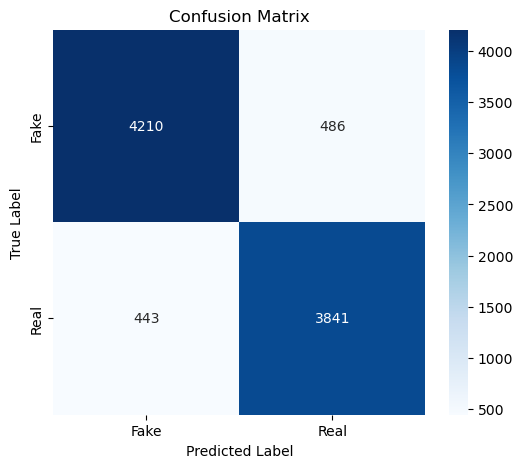

In [39]:

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


📌 **Interpretation**:
- The diagonal values show **correct classifications** (True Positives & True Negatives).  
- Off-diagonal values indicate **misclassifications**.  

---

### **Summary of Step 5**  

✅ **Model Accuracy**: **89.65%** on the test set.  
✅ **Balanced Precision, Recall, and F1-score (~0.90 each)**, proving effective classification.  
✅ **Confusion Matrix** visualization highlights correct & incorrect classifications.  

---


### **Step 6: Saving the Model and Tokenizer**  

To ensure that we can reuse our trained model for predictions and deployment, we need to save both the **model** and the **tokenizer**. The tokenizer is essential because it helps preprocess text data the same way during inference as it did during training.

---

### **6.1 Saving the Model (`.keras` format)**



In [49]:
# Save the trained model in .keras format
model.save("../models/fake_news_rnn.keras")

print("Model saved successfully as fake_news_rnn.keras!")




Model saved successfully as fake_news_rnn.keras!



✅ The `.keras` format preserves:
- Model architecture  
- Trained weights  
- Optimizer state  

---

### **6.2 Saving the Tokenizer**




In [50]:
# Save the tokenizer
with open("../models/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("Tokenizer saved successfully as tokenizer.pkl!")



Tokenizer saved successfully as tokenizer.pkl!



✅ This allows us to preprocess future text inputs in the same way as during training.

---

### **6.3 Loading the Saved Model and Tokenizer**  


In [53]:
# Load model
loaded_model = load_model("../models/fake_news_rnn.keras")
print("Model loaded successfully!")

# Load tokenizer
with open("../models/tokenizer.pkl", "rb") as f:
    loaded_tokenizer = pickle.load(f)
print("Tokenizer loaded successfully!")

Model loaded successfully!
Tokenizer loaded successfully!


---

### **6.4 Making Predictions with the Saved Model**  



In [55]:
# Sample text input
sample_text = ["Breaking news! Scientists discover a new planet with signs of life."]

# Preprocess using the loaded tokenizer
sequence = loaded_tokenizer.texts_to_sequences(sample_text)
padded_sequence = pad_sequences(sequence, maxlen=100, padding='post', truncating='post')

# Predict using the loaded model
prediction = loaded_model.predict(padded_sequence)

# Convert probability to label (0: Fake, 1: Real)
predicted_label = (prediction > 0.5).astype("int32")[0][0]
print(f"Predicted Label: {'Real' if predicted_label == 1 else 'Fake'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Predicted Label: Fake


---

Now, our **Simple RNN model and tokenizer are saved, reloaded, and ready for deployment!** 🚀

